### Chap2 Object-Oriented Programming

In [24]:
import numbers
import time
from math import sqrt
from abc import ABCMeta, abstractmethod
from typing import TypeVar, Union, Any
from random import randint
import matplotlib.pyplot as plt
Num = TypeVar('Num', int, float)

#### Reinforcement

##### R-2.4
Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its num-
ber of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.


In [3]:
class Flower:
    def __init__(self, name: str, n_petals: int, price: Num) -> None:
        self._name = name
        self._n_petals = n_petals
        self._price = price

    def get_name(self) -> str:
        '''get flower name'''
        return self._name
    
    def set_name(self, name: str) -> None:
        '''set flower name'''
        self._name = name

    def get_n_petals(self) -> int:
        '''get the num of flower'petrals'''
        return self._n_petals

    def set_n_petals(self, n_petals: int) -> None:
        '''set the num of flower'petrals'''        
        self._n_petals = n_petals

    def get_price(self) -> Num:
        '''get flower price'''
        return self._price

    def set_price(self, price) -> None:
        '''set flower price'''
        self._price = price

注意这里，我们一般写自己的class的时候，最后写上docstring和type,这样可以通过`help(Flower)`命令来获取自动生成的文档。不过为方便解题，我们下面有时候会省略掉。

##### R-2.5&R-2.6&2.7
R-2.5: Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.


R-2.6: If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.

R-2.7: The CreditCard class of Section 2.3 initializes the balance of a new ac-
count to zero. Modify that class so that a new account can be given a
nonzero balance using an optional fifth parameter to the constructor. The
four-parameter constructor syntax should continue to produce an account
with zero balance.

In [7]:
class CrediCart:
    def __init__(self, customer, bank, acnt, limit, balance=0):
        self._cunstomer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = balance

    def charge(self, price: Num):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if charge was processed; False if charge was denied.
        """
        try: 
            assert isinstance(price, (int, float, complex))
        except AssertionError:
            print("The price must be a number!")
            # exit the function
            return
        # if charge would exceed limit,
        if price + self._balance > self._limit:
            return False
        # cannot accept charge
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        # is a number or not
        try: 
            assert isinstance(amount, numbers.Number)
        except AssertionError:
            print("The amount must be a number!")
            # exit the function
            return
        # is positive or not
        if amount < 0:
            raise ValueError("amount must be a positive number")
        """Process customer payment that reduces balance."""
        self._balance -= amount

注意这里我们无非就是加进去一个异常检测，检测给的参数是不数字，这里对于两个检测，我们给出两个不同的方法，`isinstance(price, (int, float, complex))`与`isinstance(amount, numbers.Number)`，二者均可，参考[这里](https://stackoverflow.com/questions/11204789/how-to-properly-use-pythons-isinstance-to-check-if-a-variable-is-a-number).

##### R-2.9 -> R-2.15

主要就是定义一个`Vector`类，并实现向量的一些运算。

注意下面在类内部使用type hint的方法，参考[Type of the same class inside the class](https://github.com/python/mypy/issues/3661)

In [9]:
class Vector:
    def __init__(self, data_or_n: Any) -> None:
        if isinstance(data_or_n, int):
            self._data = [0] * data_or_n
            self._len = data_or_n
        elif isinstance(data_or_n, list):
            self._data = data_or_n
            self._len = len(data_or_n)
        else:
            raise ValueError("Vector must be initialized by a int or list!")


    def __repr__(self) -> str:
        return repr(self._data).replace('[', '<').replace(']', '>')
    
    def __len__(self):
        return self._len

    def __getitem__(self, index: int) -> Num:
        return self._data[index]
    
    def __setitem__(self, index: int, value: Num) -> None:
        self._data[index] = value
    
    def __add__(self, v: 'Vector') -> 'Vector':
        """
        >>> v1 = Vector([1, 2, 3])
        >>> v2 = Vector([1, 1, 1])
        >>> v1 + v2
        <2, 3, 4>
        """        
        assert len(self) == len(v)
        result = Vector(self._len)
        for i in range(len(self)):
            result[i] = self._data[i] + v[i]
        return result
    
    def __radd__(self, v: 'Vector') -> 'Vector':
        return self.__add__(v)
        

    def __sub__(self, v: 'Vector') -> 'Vector':
        """
        >>> v1 = Vector([1, 2, 3])
        >>> v2 = Vector([1, 1, 1])
        >>> v1 - v2
        <0, 1, 2>
        """
        assert len(self) == len(v)
        result = Vector(self._len)
        for i in range(len(self)):
            result[i] = self._data[i] - v[i]
        return result

    def __neg__(self) -> 'Vector':
        """
        >>> -Vector([1, 2, 3])
        <-1, -2, -3>
        """
        result = Vector(self._len)
        for index, value in enumerate(self._data):
            result[index] = -value
        return result
    
    def __mul__(self, factor: Union[int, 'Vector']) -> Union[int, 'Vector']:
        """multiply with an int or vector.
        >>> v1 = Vector([1, 2, 3])
        >>> v1 * 2
        <2, 4, 6>
        >>> 2 * v1
        <2, 4, 6>
        >>> v2 = Vector([1, 1, 1])
        >>> v1 * v2
        6
        """
        if isinstance(factor, Vector):
            assert len(self) == len(factor)
            result = 0
            for i in range(self._len):
                result += self._data[i] * factor[i]
            return result
        else:
            result = Vector(self._len)
            for index, value in enumerate(self._data):
                result[index] = factor * value
            return result                   

    def __rmul__(self, factor: Union[int, 'Vector']) -> Union[int, 'Vector']:
        return self.__mul__(factor)

上述代码用`pytest`， `pyright`的检验均全部通过。

##### R-2.16
Our Range class, from Section 2.3.5, relies on the formula
max(0, (stop − start + step − 1) // step)
to compute the number of elements in the range. It is not immediately ev-
ident why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

$$max(0, (stop - start + step - 1) // step)$$
将其化简，前面的1，可以看作第一个值，
$$max(0, 1 + (stop - start - 1) // step)$$
之后，本应该加上$(stop - start)  // step$，但是考虑到其是不包括`stop`处的数值的，考虑到最小的步长为1（必须为整数），所以实际的终止点为`stop-1`, 故加上$(stop - start - 1) //  step$

##### R-2.18
Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8 th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [18]:
# code in 2.4.2
class Progression:
    def __init__(self, start=0):
        self._current = start
    
    def _advance(self):
        self._current += 1

    def __next__(self):
        if self._current is None:
            raise StopIteration
        else:
            answer = self._current
            self._advance()
            return answer

    def __iter__(self):
        return self

    def print_progression(self, n):
        print(' '.join(str(next(self)) for i in range(n)))


class FibonacciProgression(Progression):
    def __init__(self, first=0, second=1):
        # initialize base class
        # start progression at first
        super().__init__(first)
        self._prev = second - first
    
    def _advance(self):
        self._prev, self._current = self._current, self._current + self._prev

In [2]:
# solution of R-2.18
fib = FibonacciProgression(2, 2)
fib.print_progression(8)

2 2 4 6 10 16 26 42


由此得到，问题的答案为42（出现了，宇宙的终极答案:-)

##### R-2.19
When using the ArithmeticProgression class of Section 2.4.2 with an in-
crement of 128 and a start of 0, how many calls to next can we make
before we reach an integer of $2^{63}$ or larger?

In [3]:
steps = 2 ** (63 - 7)
steps

72057594037927936

#### Creativity

##### C-2.25
Exercise R-2.12 uses the mul method to support multiplying a Vector
by a number, while Exercise R-2.14 uses the mul method to support
computing a dot product of two vectors. Give a single implementation of
Vector. mul that uses run-time type checking to support both syntaxes
u v and u k, where u and v designate vector instances and k represents
a number.

其实在上面我们已经给出了这种写法，参考R-2.9 -> R-2.15

##### C-2.26 
The SequenceIterator class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named ReversedSequenceIterator that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.

In [5]:
class ReversedSequenceIterator:
    """
    A reversed iterator for Python's sequence types.
    """
    def __init__(self, sequence):
        """Create an iterator for the given sequence"""
        self._seq = sequence
        self._k = len(sequence)

    def __next__(self):
        """Return the next element(with reversed order), or else
        raise StopIteration error"""
        self._k  -= 1
        if self._k >= 0:
            return self._seq[self._k]
        else:
            raise StopIteration

    def __iter__(self):
        return self

In [6]:
rev_seq = ReversedSequenceIterator([1, 3, 5])
for i in rev_seq:
    print(i)

5
3
1


##### C-2.27 
In Section 2.3.5, we note that our version of the Range class has im-
plicit support for iteration, due to its explicit support of both len
and getitem . The class also receives implicit support of the Boolean
test, “k in r” for Range r. This test is evaluated based on a forward itera-
tion through the range, as evidenced by the relative quickness of the test
2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
more efficient implementation of the contains method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

In [13]:
class Range:
    """A class that mimic's the build-in range class"""
    def __init__(self, start, stop=None, step=1):
        if step == 0:
            raise ValueError('step cannot ne 0')
        # special case for range(n)
        if stop is None:
            start, stop = 0, start
        # calculate the effective length once
        self._length = max(0, (step - start + step - 1) // step)
        # need knowledge of the start and step(but not stop) to support __getitem__
        self._start = start
        self._step = step
        # for __contains
        self._stop = stop

    def __len__(self):
        return self._length

    def __getitem__(self, k):
        # negative index
        if k < 0:
            k += self._length

        if not 0 <= k < self._length:
            raise IndexError("index out of range")

        return self._start + k * self._step
    
    def __contains__(self, x):
        if not self._start <= x < self._stop:
            return False
        if (x - self._start) % self._step == 0:
            return True
        else:
            return False
    
    @staticmethod
    def test_contains(start=0, stop=10000000, step=1, test_n=50):
        xs = sorted([randint(start, stop) for i in range(test_n)])
        times = []
        my_range = Range(start, stop, step)
        for x in xs:
            time_s = time.time()
            x in my_range
            times.append(time.time() - time_s)
        plt.plot(xs, times)
        plt.ylim(0, 0.00002)
        plt.show()

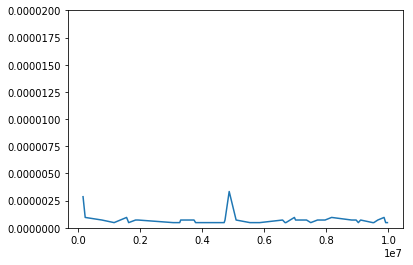

In [14]:
r = Range(0, 10000000, 1)
r.test_contains()

In [15]:
# 测试环境（需要先安装py-cupinfo库）
import cpuinfo
cpuinfo.get_cpu_info()['brand']

'Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz'

##### C-2.31
Write a Python class that extends the Progression class so that each value
in the progression is the absolute value of the difference between the pre-
vious two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.

In [19]:
class AbsdiffPrograssion(Progression):
    def __init__(self, first=2, second=200):
        super().__init__(first)
        self._prev1 = None
        self._prev2 = None
        # for starting
        self._second = second
        self._count = 1

    def _advance(self):
        # for starting
        if self._count == 1:
            self._prev1 = self._current
            self._current = self._second
        else:
            self._prev1, self._prev2 = self._current, self._prev1
            self._current = abs(self._prev1 - self._prev2)
        self._count += 1

In [21]:
t = AbsdiffPrograssion()
t.print_progression(10)

2 200 198 2 196 194 2 192 190 2


##### C-2.32
Write a Python class that extends the Progression class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your construc-
tor should accept an optional parameter specifying the start value, using
65, 536 as a default.

In [22]:
class SquareRootProgression(Progression):
    def __init__(self, start=65536):
        super().__init__(start)

    def _advance(self):
        self._current = sqrt(self._current)

In [25]:
s = SquareRootProgression()
s.print_progression(10)

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166
